<a href="https://colab.research.google.com/github/DataRecouver/Codes-DataScience-Python/blob/main/Data%20Mining/Diabetes_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
### **Desafio Final**


---
## Grupo
Ane Caroline <br/>
Carlos Alício <br/>
Felipe Coelho <br/>
Guilherme Cruz <br/>

---

***Prazo para entrega: 12/03/2023 ***

Dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

## Descrição do trabalho

As equipes devem selecionar uma base de dados real estruturada e aplicar o processo do KDD.

A primeira coisa que vocês precisam definir é o objetivo da análise. Esse objetivo pode consistir no desenvolvimento de um classificador para um determinado fim ou uma análise que use utilize utilize um classificador como ferramenta de extração de padrões.

Os critérios de avaliação serão: 

Estrutura e organização do relatório: o relatório pode estar no notebook, mas lembrem que é um relatório. É esperado que estejam textualmente descritos o objetivo do trabalho, as fontes de dados utilizadas, o dicionário de dados, o que foi realizado para alcançar objetivo, o que foi testado, o que foi observado em cada análise, as decisões tomadas e suas justificativas, análise final do que foi alcançado e suas limitações.

Análise exploratória: análise univariada e multivariada.

Pré-processamento: aplicação correta das técnicas de pré-processamento ensinadas em sala que fizerem sentido para a base analisada.

Mineração: aplicação dos algoritmos de classificação apresentados até o momento no curso e tunning de parâmetros.

Avaliação: aplicação e análise correta dos processos de avaliação que mais fazem sentido para o projeto em questão a fim de verificar a utilidade e confiabilidade dos padrões observados. Aqui eu espero não só análise estatística da performance dos classificadores, mas uma discussão sobre os padrões encontrados e as deficiências (quando ele erra mais?)
Anexem aqui o relatório final, os notebooks e as fontes de dados utilizadas. Basta uma postagem por equipe.

#Importação de bibliotecas


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px;
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


pd.set_option("display.precision", 2)
pd.set_option('mode.chained_assignment', None)

#Carregamento do dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/felipepcoelho/Diabetes/main/diabetes.csv')

**Nota:** De modo a facilitar o carregamento do dataset, em virtude do Google Colab reiniciar o ambiente, realizamos a inclusão do dataset em um servidor github e deste modo podendo ser carregado a qualquer momento durante a execução do projeto. 

# Objetivo da Análise

O objetivo é prever, utilizando o conjunto de dados, com o auxílio de um algoritmo de machine learning, se um paciente tem diabetes ou não com base em certas medições de diagnóstico apresentadas no conjunto de dados.  
<br/>

Este conjunto de dados é originalmente do National Institute of Diabetes and Digestive and Kidney Doenças. Em particular, todos os pacientes aqui são mulheres pelo menos 21 anos de herança indígena 
<br/>

Os conjuntos de dados consistem em várias variáveis ​​preditivas médicas e uma variável de *target*, **Outcome**.  
<br/>
Do conjunto de dados no arquivo (.csv) podemos encontrar diversas variáveis, algumas delas são independentes (várias variáveis ​​preditoras médicas) e apenas uma variável alvo dependente.



## Dicionário de dados

**Atributos (preditores)** 

*   Pregnancies:  Número de vezes que engravidou
*   Glucose: concentração plasmática de glicose após 2 horas em um teste oral de tolerância à glicose
*   BloodPressure: pressão arterial diastólica (mm Hg)
*   SkinThickness: Espessura da pele do tríceps (mm)
*   Insulin: insulina sérica de 2 horas (mu U/ml)
*   BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
*   DiabetesPedigreeFunction: indica a função que classifica a probabilidade de diabetes com base no histórico familiar
*   Age: Idade (anos)

**Atributos (alvo)** 

*   Outcome: Possui ou não diabetes (0 ou 1) 



# Análise Exploratória 

In [3]:
df.shape

(768, 9)

Utilizamos a função "shape" para verificar o número de registros e de atributos do dataset. Constatamos o total de 768 registros e 9 atributos  

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


Através do comando "Head" é possível observar distribuição dos dados, das primeiras linhas, tipos de variáveis e como estão o preenchimento dos registros apresentados no dataset. Além disso, utilizamos o comando *head* sobre o dataset criado para visualizar se ocorreu o correto carregamento dos registros e como estão sendo apresentados os seus atributos   

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.17,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.24,30,0
766,1,126,60,0,0,30.1,0.35,47,1
767,1,93,70,31,0,30.4,0.32,23,0


O comando "Tail", diferentemente do "Head", nos permite visualizar os dados preenchidos nas últimas linhas do dataset. Desta forma é possível observar elementos da amostra do início e do fim do dataset   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Utilizamos o comando info para verificar ocorrência de registros "NaN", nulos, apresentação dos atributos do dataset e tipo dados a qual os atributos estão aplicados. A partir do comando não identificamos valores "NaN", mas não descarta a possibilidade de registros não preenchidos, valores zerados e ou que possuam dados truncados. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


O comando describe nos permite observar o comportamento, a distribuição dos dados, de acordo com a média, quantidade de registros, percentuais máximos e mínimos. 

Podemos observar que a atributo "Age" (Idade), apresenta valores de 21 a 81 anos e que os valores de idade de 21 à 41 anos ocupam 75% do valor da amostra e desta forma é possível inferir que somente 25% da amostra apresenta idade superior a 41 anos.

Considerando que basicamente, a pré-diabetes acontece quando a glicose não é metabolizada, nem aproveitada o suficiente, de modo a acumular no sangue. O estado de normalidade da glicemia em jejum é de 70 mg/dl a 100 mg/ld.

Uma pessoa é classificada como pré-diabética ao medir a sua glicemia em jejum e atingir entre 100 e 125 mg/dl. Já aqueles que atingem a partir de 126 mg/dl são considerados diabéticos. Com base nesta informação já é possível observar registros que se encontram nesta faixa 

O atributo Glucose e BloodPressure apresentaram valores 0 como mínimos da amostra, consideramos como uma provável ausência de dados  

Em um organismo saudável, os níveis de açúcar no sangue e os valores de insulina encontram-se equilibrados. No entanto, em condições de resistência à insulina, o corpo passa a produzir uma quantidade de insulina muito superior à normal.

indivíduo saudável: inferior a 140 mg/dl;
indivíduo com resistência à insulina: entre 140 e 199 mg/dl;
indivíduo com diabetes: igual ou superior a 200 mg/dl. Observa-se na amostra valores 
0, provavel situação de registro não preenchido ou truncado, como também, valores extremamente elevados como ex: 846 mg/dl e que sugere um possível valor de outlier.

Fonte: https://www.tjdft.jus.br/informacoes/programas-projetos-e-acoes/pro-vida/dicas-de-saude/pilulas-de-saude/voce-sabe-o-que-e-a-pre-diabetes-entenda-tudo-sobre-o-assunto#:~:text=O%20estado%20de%20normalidade%20da,mg%2Fdl%20s%C3%A3o%20considerados%20diab%C3%A9ticos.

Fonte: https://labvw.com.br/blog/o-que-fazer-em-relacao-a-insulina-alta/#:~:text=indiv%C3%ADduo%20saud%C3%A1vel%3A%20inferior%20a%20140,superior%20a%20200%20mg%2Fdl.

###Verificação de elementos nulos e valores faltantes.

In [8]:
#Verificar ocorrências de dados com valor atribuído igual a zero 
def verificar_qt_zeros(df_veri):
  cols = df_veri.columns
  print('Quantidade de valores zerados:')
  for cl in cols:
    if(cl != 'Outcome' and cl != 'Pregnancies'):
      print(cl,'-', df_veri[cl][df_veri[cl]==0].count())

In [9]:
#Função para gerar os barplots para análises 
def gerar_barplot(values_N, values_I, labels, title, legend_N, Legend_Y, label_x, label_Y):
          x = np.arange(len(labels))
          width = 0.35

          fig, ax = plt.subplots(figsize = (14,6))
          barra_nac = ax.bar(x - width/2, values_N, width, label=legend_N)
          barra_inter= ax.bar(x + width/2, values_I, width, label=Legend_Y)

          ax.set_title(title)
          ax.set_xlabel(label_x)
          ax.set_ylabel(label_Y)
          ax.set_xticks(x)
          ax.set_xticklabels(labels)
          ax.legend()

          def autolabel(rects):
              for rect in rects:
                  height = rect.get_height()
                  ax.annotate('{}'.format(height),
                              xy=(rect.get_x() + rect.get_width() / 2, height),
                              xytext=(0, 3),  # 3 points vertical offset
                              textcoords="offset points",
                              ha='center', va='bottom')


          autolabel(barra_nac)
          autolabel(barra_inter)

          fig.tight_layout()
          plt.show()  

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Utilizamos a função "isnull" para verificar ocorrências de dados NaN, nulos,  dentro da amostra. Através da função, não identificamos ocorrências nos registros. 

In [11]:
verificar_qt_zeros(df)

Quantidade de valores zerados:
Glucose - 5
BloodPressure - 35
SkinThickness - 227
Insulin - 374
BMI - 11
DiabetesPedigreeFunction - 0
Age - 0


Através da função verificar_qt_zeros, aplicada sobre o Dataset, identificamos a ocorrência de 5 atributos que apresentam valores dos registros igual a zero. Dentre os atributos, identificamos 3 deles apresentam baixa ocorrência e 2 deles uma quantidade elevada de registros com valores zerados.

Vale destacar, que para análise não foram considerados atributos do tipo Booleanos

## Análise univariada

### Tratando atributo **"Glucose"**

Verificando a ocorrência de valores de Glucose diferente de zero

<AxesSubplot:>

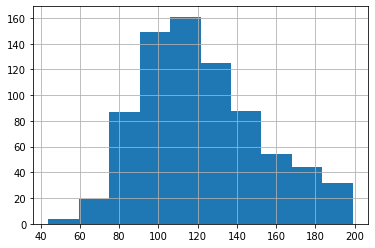

In [12]:
df['Glucose'][(df['Glucose']!=0)].hist()

Através do gráfico, identificamos que a amostra de valores de Glucose, diferente de zero, assemelha a uma distribuição próxima da normal. Desta forma, permitindo que seja utilizada a mediana como valor substituto as ocorrência de registro igual a zero. Essa estratégia só será possível mediante a baixa ocorrência de valores igual a zero neste atributo e que não irá impactar em uma alteração na distribuição dos dados. 

In [13]:
df['Glucose'][(df['Glucose']!=0)].median()

117.0

O valor encontrado para mediana foi de 117 e será utilizado para substituição em situação em que seja identificado o valor zero ao registro, neste atributo.

### Tratando atributo **"BloodPressure"**

<AxesSubplot:>

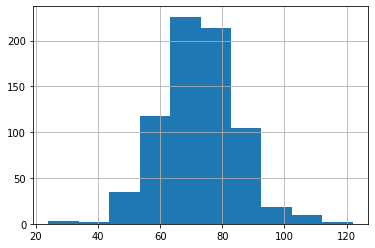

In [14]:
df['BloodPressure'][(df['BloodPressure']!=0)].hist()

É observado o prolongamento da distribuição dos dados no Histograma, para a esquerda e para a direita, sinalizando a presença de valores extremos. A fim de uma melhor visualização, iremos realizar a projeção dos dados através do gráfico boxplot.  

<AxesSubplot:>

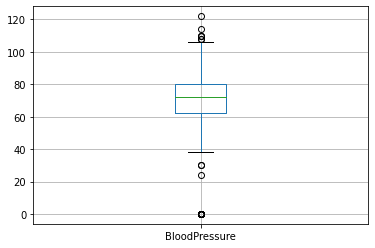

In [15]:
df.boxplot(['BloodPressure'])

Utilizando o gráfico de boxplot é observada situações de outliers tanto para base do gráfico e ao topo. Porem, a maioria dos registros seguem uma distribuição entre 0 e 75%. Esse recorte será utilizado para atribuir o valor da mediana em substituição das ocorrências de valores zerados.

<AxesSubplot:>

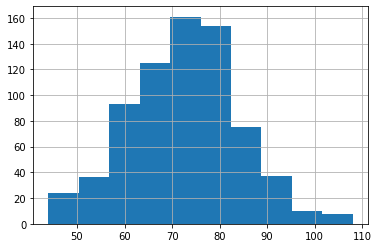

In [16]:
df['BloodPressure'][(df['BloodPressure']!=0) & (df['BloodPressure']>40) & (df['BloodPressure']<110)].hist()

Realizamos a projeção dos registros, através do gráfico histograma, desta vez, não considerando os valores em outlier. O coportamento da amostra demostrou possivel semelhança com uma distribuição normal e desta forma permitindo a suposição anterior. Assim valores de ocorrência igual a zero, dentro de registros, neste atributo, será imputado a mediana dos registros que seguem uma distribuição normal.  

In [17]:
df['BloodPressure'][(df['BloodPressure']!=0) & (df['BloodPressure']>= 40) & (df['BloodPressure']<= 110)].median()

72.0

Utilizando a consulta a cima, identificamos que o valor da mediana para registros onde a BloodPressure seja diferente de zero e com ocorrência entre 40 e 110 reflete um valor de mediana igual a 72.

### Tratando atributo **"SkinThickness"**

<AxesSubplot:>

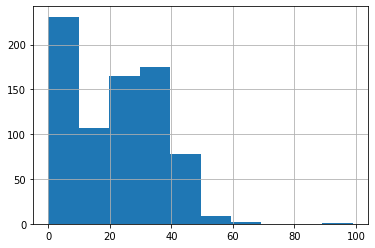

In [18]:
df['SkinThickness'].hist()

Analisando o histograma, com ocorrência de valores igual a zero, observamos um pico de registro que apresentam este valor. 

In [19]:
(len(df[df['SkinThickness'] ==0]) * 100) / len(df) 

29.557291666666668

Verificando o percentual de registro com valores igual a zero, sobre a amostra, identificamos que estes percentuais chegam 29% dos registros o que impede a aplicação de valores como média ou mediana em uma possível situação de normalização dos registros, isso porque, mudaria a distribuição dos dados 

<AxesSubplot:>

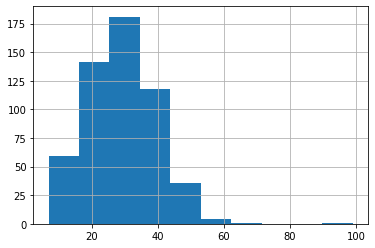

In [20]:
df['SkinThickness'][df['SkinThickness'] != 0].hist()

Observando os valores diferentes de zero, ainda são apresentandos registros extermos, neste caso, a direita do gráfico. Iremos verificar a proporção que nos valores preenchidos é observado que valores inferiores a 55 permintem uma tendência da normalização da amostra.  

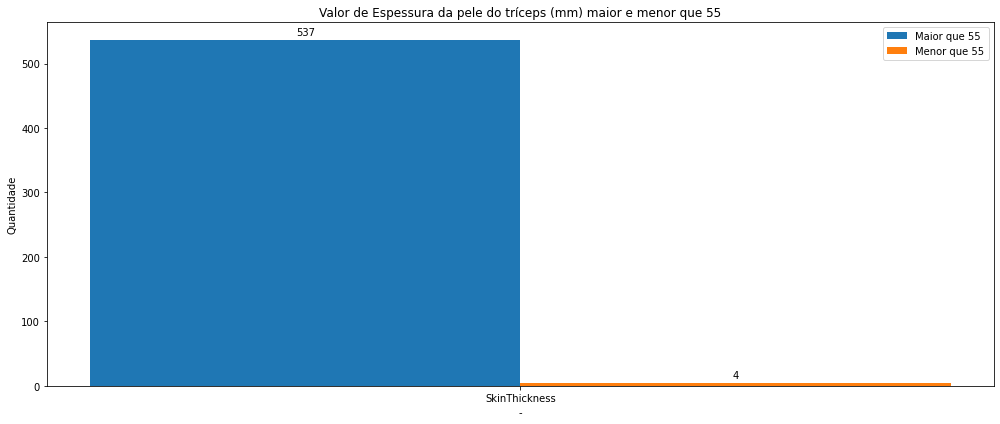

In [21]:
gerar_barplot(df['SkinThickness'][(df['SkinThickness']!=0) & (df['SkinThickness']<55)].count(),
              df['SkinThickness'][(df['SkinThickness']!=0) & (df['SkinThickness']>55)].count(),
              ['SkinThickness'], 'Valor de Espessura da pele do tríceps (mm) maior e menor que 55', 'Maior que 55', 'Menor que 55', '-', 'Quantidade')

<AxesSubplot:>

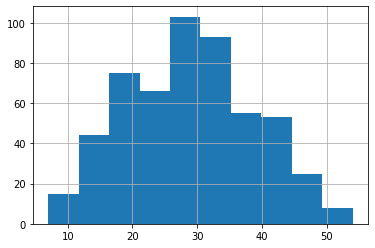

In [22]:
df['SkinThickness'][(df['SkinThickness']!=0) & (df['SkinThickness']<55)].hist()

Deste modo, se constata uma tendência de distribuição normal para valores maiores que 0 e menores que 55, que representam em torno de 95% da amostra. 

<AxesSubplot:>

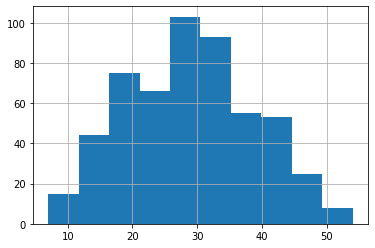

In [23]:
df['SkinThickness'][(df['SkinThickness']!=0) & (df['SkinThickness']<55)].hist()

Vamos considerar uma possível estratégia para preenchimento de dados ausentes a utilização do reange maior que 0 e menor que 55 onde será realizada uma seleção aleatória da valores da amostra para substituição de ocorrências de regsitro igual zero.

### Tratando atributo **"Insulin"**

<AxesSubplot:>

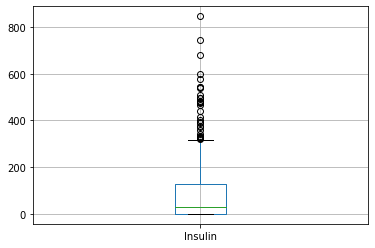

In [24]:
df.boxplot(['Insulin'])

Ao analisar o gráfico de boxplot, identificamos diversos registros, extremos, localizados na seção superior do gráfico. Estes registros são possíveis ocorrências de outliers. Além disso, é observado que o gráfico apresenta um grande percentual de registros com valores igual a zero.  

In [25]:
(len(df[df['Insulin'] == 0]) * 100) / len(df) 

48.697916666666664

Conforme gráfico anteriormente analisado, observamos que o percentual dos registros com valores igual a zero representam um percentual de 48% dos registros presente na amostra.

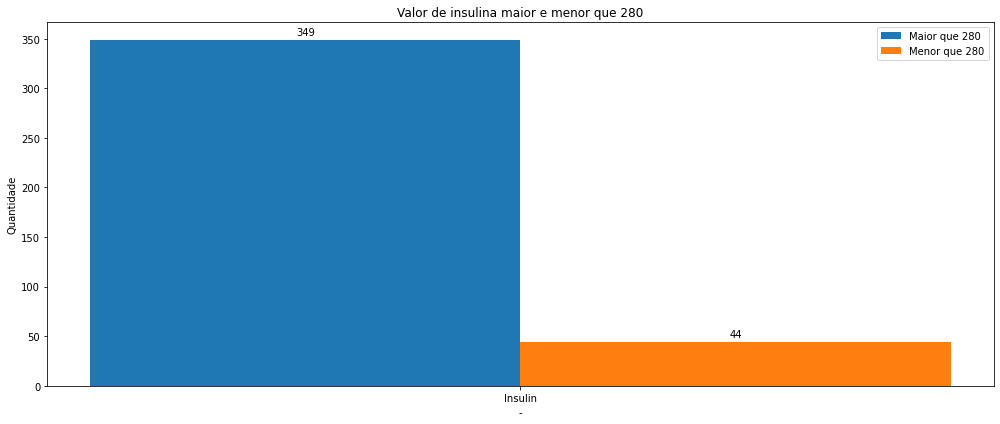

In [26]:
gerar_barplot(df['Insulin'][(df['Insulin']!=0) & (df['Insulin']<280)].count(),
              df['Insulin'][(df['Insulin']!=0) & (df['Insulin']>280)].count(),
              ['Insulin'], 'Valor de insulina maior e menor que 280', 'Maior que 280', 'Menor que 280', '-', 'Quantidade')

Dos valores preenchidos observa-se que existe uma faixa entre, de corte, que são maiores que 280 e menores que 280. Esta situação demonstra que 393 registros estão preenchidos e correspondem a 88% da amostra.

<AxesSubplot:>

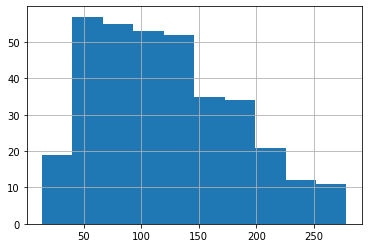

In [27]:
df['Insulin'][(df['Insulin']!=0) & (df['Insulin']<280)].hist()

Vamos considerar uma possível estratégia para preenchimento de dados ausentes a utilização de registros o valor seja menor que 280. Onde será realizada uma seleção aleatória da valores da amostra para substituição de ocorrências de regsitro igual zero.

### Tratando atributo **"BMI"**

<AxesSubplot:>

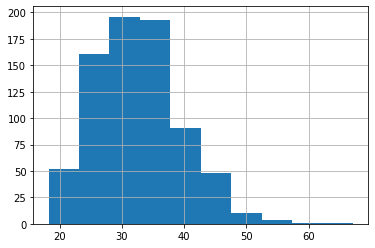

In [28]:
df['BMI'][(df['BMI']!=0)].hist()

O objetivo será tratar situações ocorrência de valores igual a zero. Neste caso, utilizamos um gráfico do tipo histograma para visualizar a distribuição dos registros com valores diferentes de zero.

<AxesSubplot:>

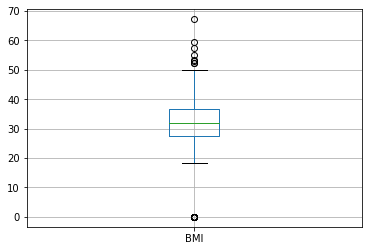

In [29]:
df.boxplot(['BMI'])

Ao analisar, por meio de um gráfico boxplot, observamos que existe uma quantidade de registros na base e no topo do gráfico representando situações de outlier.

<AxesSubplot:>

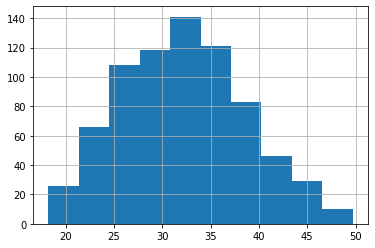

In [30]:
df['BMI'][(df['BMI']!=0) & (df['BMI']<50)].hist()

Vamos considerar uma possível estratégia para preenchimento de dados ausentes a utilização do reange maior que 0 e menor que 50 onde será realizada uma seleção aleatória da valores da amostra para substituição de ocorrências de regsitro igual zero.

## Engenharia de atributos

### Novos atributos

**Teste de glicose (Glucose)**

Normal: Nível de glicose em duas horas inferior a 140 mg/dL

Elevado: Nível de glicose em duas horas 140 a 200 mg/dL

Diagnostico provável para Diabetes: Nível de glicose em duas horas superior a 200 mg/dL

**Teste de Pressão Arterial (BloodPressure)**

Normal: Sistólica abaixo de 120 e diastólica abaixo de 80  

Elevada: sistólica 120–129 e diastólica abaixo de 80  

Hipertensão estágio 1: sistólica 130-139 e diastólica 80-89  

Hipertensão estágio 2: sistólica 140 ou mais e diastólica 90 ou mais  

Crise hipertensiva: Sistólica acima de 180 e diastólica acima de 120


**Teste de IMC (BMI)**

Baixo peso: Abaixo de 18.5  

Peso Normal ou Saudável: 18.5 – 24.9  

Excesso de peso: 25.0 – 29.9

Obeso: 30.0 e Acima  

**Teste de Insulina (Insulin)**

Normal: inferior a 140 mg/dl

Resistência a Insulina: entre 140 e 199 mg/dl

Com Diabetes: igual ou superior a 200 mg/dl


In [31]:
#Gerando a categoria Glucose de acordo aos valores de referência a cima
df["categoria_Glucose"] = df['Glucose'].map(lambda x: 'normal' if x<140 else ('elevado' if x>140 and x<200 else 'com_diabetes'))


In [32]:
#Gerando a categoria BloodPressure de acordo aos valores de referência a cima
df["categoria_BloodPressure"] = df['BloodPressure'].map(lambda x: 'normal' if x<80 else ('elevado_hiper_nivel1' if x>80and x<90 else ('hiper_nivel_2' if x>90and x<120 else 'crise')))

In [33]:
#Gerando a categoria BMI de acordo aos valores de referência a cima
df["categoria_BMI"] = df['BMI'].map(lambda x: 'baixo' if x<18.5 else ('normal' if x>18.5 and x<24.9 else ('sobrepeso' if x>25.0 and x<29.9 else 'obesidade')))

In [34]:
#Gerando a categoria Insulin de acordo aos valores de referência a cima
df["categoria_insulin"] = df['Insulin'].map(lambda x: 'normal' if x<140 else ('resistencia_insulina' if x>140 and x<200 else 'com_diabetes'))

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,categoria_Glucose,categoria_BloodPressure,categoria_BMI,categoria_insulin
0,6,148,72,35,0,33.6,0.63,50,1,elevado,normal,obesidade,normal
1,1,85,66,29,0,26.6,0.35,31,0,normal,normal,sobrepeso,normal
2,8,183,64,0,0,23.3,0.67,32,1,elevado,normal,normal,normal
3,1,89,66,23,94,28.1,0.17,21,0,normal,normal,sobrepeso,normal
4,0,137,40,35,168,43.1,2.29,33,1,normal,normal,obesidade,resistencia_insulina


Utilizamos o comando Head para visualizar o dataset após a criação dos novos atributos, conforme metricas de controle e definições na seção engenharia de atributos.  

## Análise multivariada.

<AxesSubplot:>

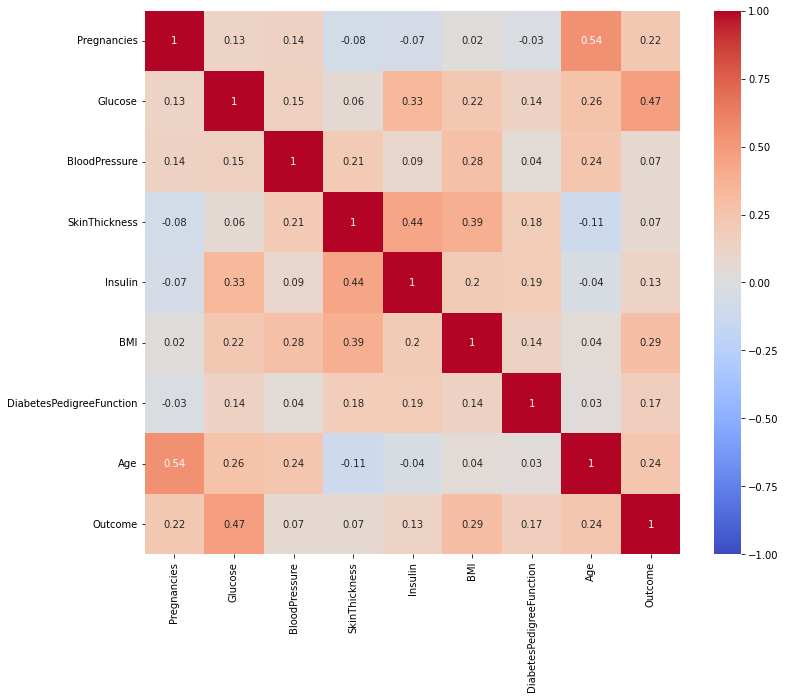

In [36]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Usamos o gráfico a cima para visualizar a correlação, buscando demostrar o indice de correlação em função dos atributos. Demostrando quais atributos seriam mais indicados e menos indicados na construção do modelo.

In [37]:
#Função para gerar um gráfico de pontos em uma análise multivariada
def analise_multivariada_point(x_var, y_var, x_label, y_label, title, color_list=[]):
  fig=px.scatter(df, x = x_var, opacity=0.5, y = y_var,  width = 800)
  if(len(color_list) >0):
    fig=px.scatter(df, x = x_var, opacity=0.5, y = y_var,  width = 800, color=color_list)
  fig.update_layout(title = title)
  fig.update_xaxes(title = x_label)
  fig.update_yaxes(title = y_label)
  fig.show()


In [38]:
analise_multivariada_point('Glucose', 'Insulin', 'Glucose', 'Insulin', 'Glucose X Insulin')

Através do gráico, interativo, é possível visualizar a distribuição de atributos em função de outros atributos presentes no dataset. Observa-se que na relação dos atributos Glicose x Insulina o atributo glicose apresenta valores entre 100 e 200 apresentando uma leve tendência no aumento da insulina em função da glicose.

In [39]:

analise_multivariada_point('Glucose', 'Insulin', 'Glucose', 'Insulin', 'Glucose X Insulin', 'categoria_BMI')

Observa-se que no gráfico, interativo, foi apresentado ao mesmo um categorizador do BMI, este categorizador permite visualizar o registros em função das categorias existentes que são (Obesidade, sobrepeso, normal, baixo) que reflete o  Índice de massa corporal - IMC. Pessoas com um IMC baixo ou normal apresentam índice de Glicose e Insulina entre 50 e 150. Valores que compreende a obesidade ultrapassam o 150 permitindo inferir que possa ser um possível caminho para a idetificação das ocorrências de diabetes. 

# Pré-processamento

In [40]:
def pre_processar_get_data(df:pd.core.frame.DataFrame):
  #remoção de atributos do dataset
  _df = df.copy()
  _df.drop(columns=['Outcome'], inplace = True)
  return _df.to_numpy()

In [41]:
def pre_processar_get_target(df:pd.core.frame.DataFrame):
  #remoção de atributos do dataset
  _df = df.copy()
  _df = df['Outcome']
  return _df.to_numpy()

In [42]:
def tratamentoValoresBloodPressure(df:pd.core.frame.DataFrame):
  #declaração de variaveis
  _mediana = 72.0 #valor da média calculado sobre o conjunto de dados de teste
  _df = df.copy()
  _df['BloodPressure'][df['BloodPressure']== 0] = _mediana
  return _df

In [43]:
def tratamentoValoresGlucose(df:pd.core.frame.DataFrame):
  #declaração de variaveis
  _mediana = 117.0 #valor da média calculado sobre o conjunto de dados de teste
  _df = df.copy()
  _df['Glucose'][df['Glucose']==0] = _mediana
  return _df

In [44]:
def tratamentoValoresBMI(df:pd.core.frame.DataFrame):
  #declaração de variaveis
  _mediana = 32.0 #valor da média calculado sobre o conjunto de dados de teste
  _df = df.copy()
  _df['BMI'][df['BMI'] == 0] = _mediana
  return _df

In [45]:
def pre_processar(df:pd.core.frame.DataFrame):
  #declaração de variaveis
  _df = df.copy()
  _df = tratamentoValoresGlucose(_df)
  _df = tratamentoValoresBloodPressure(_df)
  _df = tratamentoValoresBMI(_df)
  _df = pd.get_dummies(_df,['categoria_Glucose','categoria_BloodPressure','categoria_BMI','categoria_insulin'], drop_first = True)

  return _df

# Mineração 
Aplicação dos algoritmos de classificação 

In [46]:
df_treino_preocessado = pre_processar(df)

<AxesSubplot:>

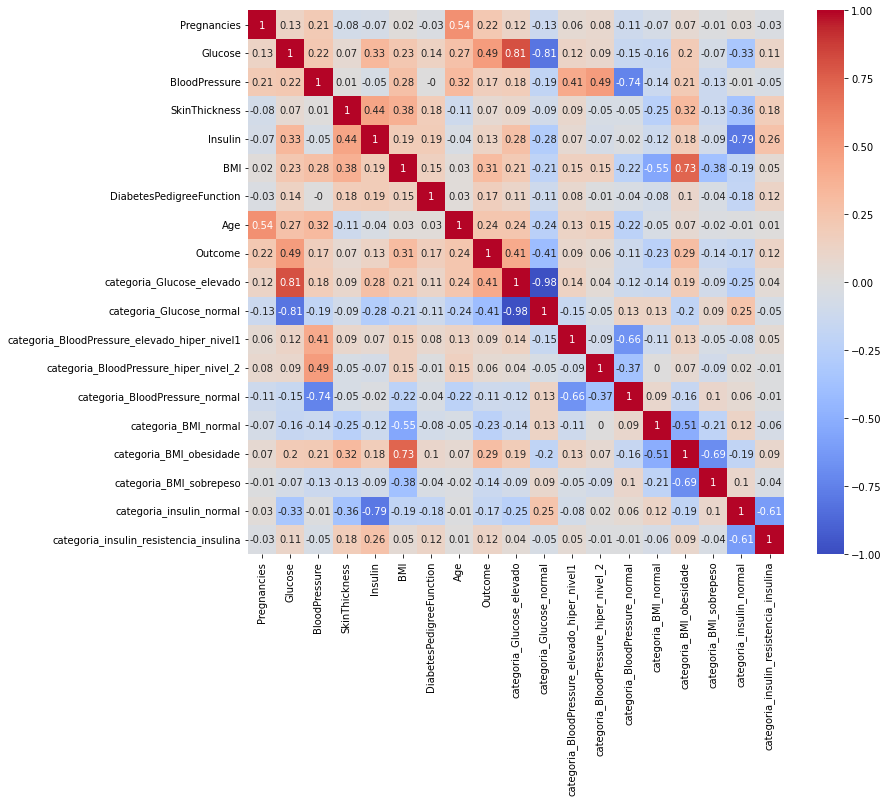

In [47]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(df_treino_preocessado.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Através do gráfico a cima é possível observar a criação dos novos atributos, do tipo númerico, sobre os categorizadores criados na seção engenharia de dados. Observa-se uma correlação natural destes atributos com os seus predecessores. Este gráfico é plotado a partir da função "corr" que é usada para encontrar a correlação de pares de todas as colunas no dataframe  

## Preparação dos dados

In [48]:
#dados de teste 


x_treino, x_teste, y_treino, y_teste = train_test_split(pre_processar_get_data(df_treino_preocessado), 
                                                             pre_processar_get_target(df_treino_preocessado),test_size = 0.30, random_state = 101)

Neste momento, realizamos a preparação dos dados em treino e teste. Optamos pela seguinte divisão 30% em treino e 70% para teste.

## KNN

In [49]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_treino, y_treino)
predictions = neigh.predict(x_teste)


accuracy = accuracy_score(y_teste, predictions)
print("Acurácia:", accuracy)
precision = precision_score(y_teste, predictions)
print("Precisão:", precision)
recall = recall_score(y_teste, predictions)
print("Recall:", recall)

print(classification_report(y_teste, predictions))

Acurácia: 0.7272727272727273
Precisão: 0.6451612903225806
Recall: 0.49382716049382713
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



Observa-se uma precisão de 76% no modelo, vale destacar que a precisão trata-se de identificar um determinado resultado de maneira precisa. Mas vale destacar que buscamos para esse modelo o melhor resultado em recall, devido a sua natureza, já que a recall é utilizada para indicar a relação entre as previsões positivas realizadas corretamente e todas as previsões que realmente são positivas 

Aplicação do GridSearch para tuning de parâmetros do modelo - KNN

In [50]:
#Os parâmetros numéricos foram escolhidos e variados de acordo com o resultado de acurácia. Por sua vez, para os não numéricos
#foram utilizadas as opções possíveis para obter-se a melhor combinação.
parameters_KNN = {'n_neighbors': range(1,30,1),
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski'],
              'leaf_size': range(1,20,1)
              }

In [ ]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters_KNN)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

In [ ]:
neigh = KNeighborsClassifier(metric = 'euclidean',
                             leaf_size = 1,
                             weights = 'distance',
                             n_neighbors=10)
neigh.fit(x_treino, y_treino)
predictions = neigh.predict(x_teste)


accuracy = accuracy_score(y_teste, predictions)
print("Acurácia:", accuracy)
precision = precision_score(y_teste, predictions)
print("Precisão:", precision)
recall = recall_score(y_teste, predictions)
print("Recall:", recall)

print(classification_report(y_teste, predictions))

Embora o GridSearchCV tenha nos indicado a melhor parametrização ao algorimto identificamos que não houve uma efetiva melhora a partir desta parametrização nas métricas de Precisão, Recall e f1-score

##SVM

In [ ]:
# Create SVM classification object 
model = svm.SVC(kernel='linear', gamma=1)
model.fit(x_treino, y_treino)
model.score(x_treino, y_treino)
#Predict Output
predicted= model.predict(x_teste)

accuracy = accuracy_score(y_teste, predicted)
print("Acurácia:", accuracy)
precision = precision_score(y_teste, predicted)
print("Precisão:", precision)
recall = recall_score(y_teste, predicted)
print("Recall:", recall)

print(classification_report(y_teste, predicted))

Aplicação do GridSearch para tuning de parâmetros do modelo - SVM

In [ ]:
#Criando dois laços for para cobrir ranges de parâmetros para tuning do modelo.
#gamma_SVM=[int (x) for x in np.linspace(start=0.001, stop=1)]
#C_SVM=[int (x) for x in np.linspace(start=1, stop=2)]
gamma_SVM = [1, 0.1, 0.01, 0.001, 0.0001]
C_SVM = [0.1, 1, 10, 100]
parameters_SVM = {'gamma': gamma_SVM,
              'C': C_SVM,
              'gamma':['scale', 'auto'],
              'kernel':['linear']}

In [ ]:
#grid_search=GridSearchCV(estimator=svm.SVC(),param_grid=parameters_SVM)
#grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=parameters_SVM, refit = True, verbose = 3,n_jobs=-1)
#grid_search.fit(x_treino, y_treino)
#parameters_improved=grid_search.best_params_
#best_result= grid_search.best_score_
#print(parameters_improved)
#print(best_result)

* Não conseguimos realizar o GridSearch para o algoritmo SVM. A operação durou mais de 29min situação em que foi interrompida

## RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators = 9)
model_fit = model.fit(x_treino, y_treino)
predicted = model_fit.predict(x_teste)

print(classification_report(y_teste, predicted))

Aplicação do GridSearch para tuning de parâmetros do modelo - RandomForest

In [ ]:
#Criando um for para cobrir um range de estimadores para parâmetro do tuning. Foi possível observar que a medida em que o parâmetro 'start'
#aumenta, obtem-se também um melhor resultado de acurácia. Os valores foram escolhidos e variados com o objetivo de
#obtenção do melhor resultado de acurácia.
n_estimators_GS=[int (x) for x in np.linspace(start=13, stop=25,num=1)]
parameters_RF = {'n_estimators': n_estimators_GS}

In [ ]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters_RF)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

## Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',
min_samples_leaf=5,
min_samples_split=5,
max_depth=None,
random_state=10)
tree.fit(x_treino, y_treino)
predicted = tree.predict(x_teste)
accuracy = accuracy_score(y_teste, predicted)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
print(classification_report(y_teste, predicted))

Aplicação do GridSearch para tuning de parâmetros do modelo - Decision Tree

In [ ]:
#Os parâmetros numéricos foram escolhidos e variados de acordo com o resultado de acurácia. Por sua vez, para os não numéricos
#foram utilizadas as opções possíveis para obter-se a melhor combinação.
parameters_DT = {'criterion': ['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[5,10]}

In [ ]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters_DT)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

Utilizamos o GridSearchCV para identificar a melhor parametrização possível, aplicável, ao algoritmo árvore de decisão e sendo indicado a seguinte configuração 'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'  

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',
min_samples_leaf=10,
min_samples_split=2,
max_depth=None,
splitter = 'random')
tree.fit(x_treino, y_treino)
predicted = tree.predict(x_teste)
accuracy = accuracy_score(y_teste, predicted)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
print(classification_report(y_teste, predicted))

Observamos que após a parametrização, conforme indicação do GridSearchCV, cheagamos a um patamar de 93% em Recall e 78% de precisão o indicador f1-score chegou a 84%.  

# Avaliação

Com se trata de um algoritmo para predição de resultados positivos ou negativos na indicação de diabetes consideramos a métrica de avaliação mais indicada a Recall já que o erro possui peso diferente ao acerto e nas situações de falso negativo, ou seja, quando a pessoa possuir a doença e o algoritmo indicar a inexistência da mesma irá acarretar no não tratamento ou na demora da iniciação do mesmo e podendo causar prejuízos irreversíveis ao portador. Consideramos que o modelo deve utilizar o algoritmo **Árvore de Decisão** devido o mesmo apresentar ótimos resultados de precision, recall  e f1-score dentre os algoritmos. Vale destacar que este modelo foi construindo a partir de um conjunto de dados  originalmente do National Institute of Diabetes and Digestive and Kidney Doenças. Em particular, todos os pacientes aqui são mulheres pelo menos 21 

O escolha pela métrica Recall como a mais indicada ao nosso modelo é pelo fato de nos dá informações sobre falsos negativos. Essa métrica por si só não é diretamente vinculada a classificar todos os casos corretamente. Ela indica o quanto nosso modelo está identificando os casos positivos corretamente.